# Tratamiento de datos
<hr>

In [1]:
import pandas as pd
import numpy as np

In [3]:
classification_data = pd.read_csv("../B3DB_classification.tsv",
                                  sep="\t")

In [4]:
classification_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference', 'group', 'comments'],
      dtype='object')

In [5]:
classification_data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [6]:
classification_data["BBB+/BBB-"].value_counts()

BBB+/BBB-
BBB+    4956
BBB-    2851
Name: count, dtype: int64

In [9]:
df = classification_data[["SMILES", "BBB+/BBB-"]]

In [10]:
df.head()

,SMILES,BBB+/BBB-
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-


In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem

def calcular_ecfp(smiles, radius=2, nBits=2048):

    # Generar la molécula desde la cadena SMILES
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Error: No se pudo generar la molécula desde SMILES '{smiles}'.")

    # Calcular el ECFP
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)

    # Función para convertir ExplicitBitVect a NumPy array
    def explicit_bit_vector_to_numpy(bit_vector):
        size = bit_vector.GetNumBits()  # Obtener el tamaño del vector de bits
        array = np.zeros(size, dtype=np.int8)  # Crear un array de ceros de tamaño size
        for i in range(size):
            if bit_vector.GetBit(i):  # Si el bit en la posición i está activo
                array[i] = 1  # Establecer el valor en el array como 1
        return array

    # Convertir ExplicitBitVect a NumPy array
    fp_array = explicit_bit_vector_to_numpy(fp)

    return fp_array


In [12]:
df["ECFP"] = df["SMILES"].apply(calcular_ecfp)

[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerator
[14:00:51] DEPRECATION WARNING: please use MorganGenerat

In [13]:
df

,SMILES,BBB+/BBB-,ECFP
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
ecfp_data = df["ECFP"].values

In [15]:
ecfp_data

array([array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 1, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8), ...,
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8)], dtype=object)

In [16]:
ecfp_matrix = np.vstack(ecfp_data)

In [17]:
ecfp_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [18]:
df2 = pd.DataFrame(ecfp_matrix)

In [19]:
df = pd.concat([df,df2], axis=1)

In [20]:
df

,SMILES,BBB+/BBB-,ECFP,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.to_csv("Datos_con_ECFP.csv", index=False)

In [22]:
X = df.drop(columns=["ECFP", "SMILES","BBB+/BBB-"])
y = df["BBB+/BBB-"]

# PCA


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [66]:
pca.fit(X)

PCA(n_components=2)

In [67]:
data = pca.transform(X)

In [68]:
data

array([[-1.30615763, -0.02758914],
       [-0.50649244,  2.09161788],
       [-1.15148045, -0.99538365],
       ...,
       [-0.9999482 , -0.41154957],
       [-0.84763797, -0.58245851],
       [-0.8865619 , -0.39936935]])

In [69]:
import matplotlib.pyplot as plt

In [70]:
data[:, 0]

array([-1.30615763, -0.50649244, -1.15148045, ..., -0.9999482 ,
       -0.84763797, -0.8865619 ])

In [71]:
def color(bbb):
    if bbb == "BBB-":
        return "#E03611"
    else:
        return "#11B7E0"

In [72]:
df["color"] = df["BBB+/BBB-"].apply(color)

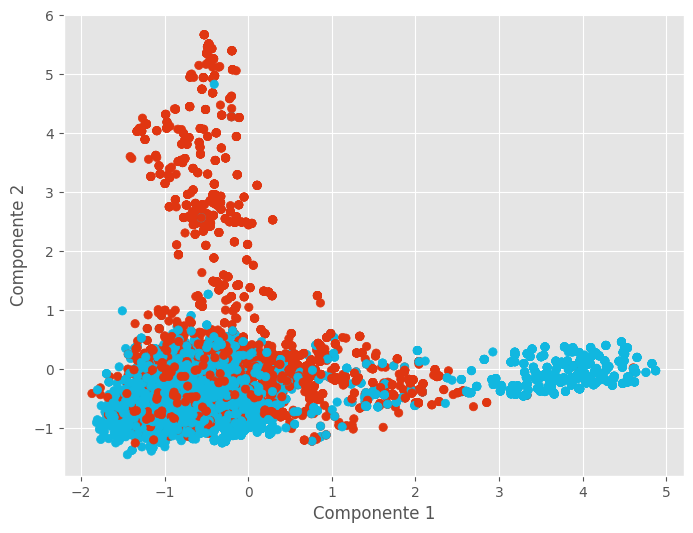

In [73]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c = df["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

In [74]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[5.64287709 3.52734311]


In [75]:
pca2 = PCA(n_components=150)

In [76]:
pca2.fit(X)

PCA(n_components=150)

In [77]:
pca2.transform(X).shape

(7807, 150)

In [78]:
explained_variance = pca2.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance*100)

[ 5.64287709  9.17022022 11.65413381 13.85297774 15.80419735 17.4402965
 18.97224786 20.28748849 21.51554714 22.71507062 23.87410293 24.9740006
 26.06012274 26.96537205 27.846674   28.71212606 29.56238661 30.36546338
 31.15890227 31.89568185 32.61616037 33.32845815 34.01884443 34.68176933
 35.31041958 35.92596607 36.51819623 37.0959054  37.65057184 38.18823671
 38.71946453 39.23816925 39.7338803  40.22256079 40.69798088 41.17154776
 41.63660674 42.0916987  42.52604028 42.95843026 43.38290822 43.79379619
 44.2008326  44.60120913 44.98413096 45.35975603 45.72832943 46.09174126
 46.44691476 46.79298029 47.13215547 47.46912803 47.80428188 48.12990943
 48.44879648 48.76100246 49.06812439 49.36962218 49.66659583 49.9612297
 50.25190634 50.54001744 50.82511868 51.10864561 51.39018623 51.66772058
 51.93931135 52.20587829 52.46731548 52.72571128 52.98098993 53.23578448
 53.48896487 53.73642133 53.98047836 54.22270844 54.46261597 54.69967095
 54.93405931 55.16494928 55.39154841 55.61734871 55.84

# Algoritmo SVC con PCA y rejilla
<hr>

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
pipe = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
])

In [82]:
param_grid = {
    'pca__n_components': [150],  # Ejemplo de opciones para el número de componentes en PCA
    'svc__C': [10, 100, 1000, 10000],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', "poly"]
}

In [83]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs= 8)

In [84]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('svc', SVC())]),
             n_jobs=8,
             param_grid={'pca__n_components': [150],
                         'svc__C': [10, 100, 1000, 10000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [85]:
grid_search.best_params_

{'pca__n_components': 150,
 'svc__C': 100,
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf'}

In [86]:
grid_search.best_score_

0.8714171337069656

In [25]:
pipe = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svc', SVC(C=1000, gamma=0.1, kernel="rbf", probability=True))
])

In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150)),
                ('svc', SVC(C=1000, gamma=0.1, probability=True))])

In [27]:
y_predicha = pipe.predict(X_test)

In [28]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.882
Recall 0.882
precision 0.881
f1 0.881


In [29]:
y_entrenamiento = pipe.predict(X_train)

In [30]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.983
Recall 0.983
precision 1.0
f1 0.983


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
mat = confusion_matrix(y_predicha, y_test)

In [33]:
import seaborn as sns

In [34]:
y_test.shape

(1562,)

<Axes: >

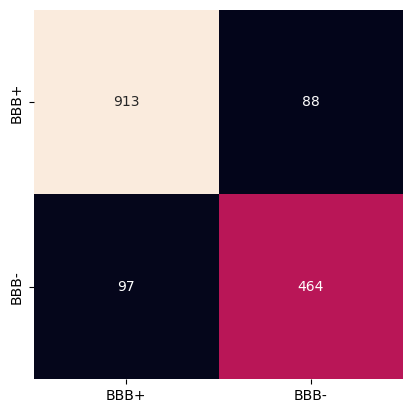

In [36]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

In [93]:
df_inhibidores = pd.read_csv("Inhibidores_duales_rigurosos.csv")

In [94]:
df_inhibidores.head()

,Unnamed: 0,Molecule ChEMBL ID,Standard Value_EGFR,Standard Value_MAPK1,Standard Value_SRC,Actividad_EGFR,Actividad_MAPK1,Actividad_SRC
0,0,CHEMBL2178352,0.4,10000.0,290.0,1,0,1
1,13,CHEMBL388978,78.0,370.0,9.7,1,1,1
2,24,CHEMBL569880,11.0,10000.0,100.0,1,0,1
3,25,CHEMBL571040,24.0,10000.0,800.0,1,0,1
4,44,CHEMBL1336,50000.0,109.5,390.0,0,1,1


In [95]:
import joblib

In [96]:
joblib.dump(pipe, 'modelo_entrenado.joblib')

['modelo_entrenado.joblib']

In [97]:
df.to_csv("ECFP_calculado.csv", index=False)

In [56]:
y_serie = pd.Series(y_test, name="Y_entrenamiento")

In [66]:
y_predicha_serie = pd.Series(y_predicha, name="Y_predicha", index=y_serie.index)

In [67]:
y_resultados = pd.concat((y_predicha_serie, y_serie), axis=1)

In [68]:
y_resultados

,Y_predicha,Y_entrenamiento
3961,BBB+,BBB+
7381,BBB-,BBB-
6095,BBB+,BBB+
586,BBB+,BBB+
5628,BBB+,BBB-
...,...,...
5216,BBB+,BBB+
5065,BBB-,BBB-
1729,BBB+,BBB+
4463,BBB+,BBB+


In [95]:
def clasificar_resultado(row):
    if row["Y_predicha"] == "BBB+" and row["Y_entrenamiento"] == "BBB+":
        return "VP"  # Verdadero Positivo
    elif row["Y_predicha"] == "BBB+" and row["Y_entrenamiento"] == "BBB-":
        return "FP"  # Falso Positivo
    elif row["Y_predicha"] == "BBB-" and row["Y_entrenamiento"] == "BBB+":
        return "FN"  # Falso Negativo
    elif row["Y_predicha"] == "BBB-" and row["Y_entrenamiento"] == "BBB-":
        return "VN"  # Verdadero Negativo

In [96]:
y_resultados["Resultado"] = y_resultados.apply(clasificar_resultado, axis=1)

In [97]:
y_resultados

,Y_predicha,Y_entrenamiento,Resultado
3961,BBB+,BBB+,VP
7381,BBB-,BBB-,VN
6095,BBB+,BBB+,VP
586,BBB+,BBB+,VP
5628,BBB+,BBB-,FP
...,...,...,...
5216,BBB+,BBB+,VP
5065,BBB-,BBB-,VN
1729,BBB+,BBB+,VP
4463,BBB+,BBB+,VP


In [100]:
FP_SVM = y_resultados[y_resultados["Resultado"] == "FP"]

In [103]:
FP_SVM.shape

(97, 3)

In [108]:
FN_SVM = y_resultados[y_resultados["Resultado"] == "FN"]

In [109]:
FN_SVM.shape

(88, 3)

In [110]:
FP_SVM.to_csv("FP_SVM.csv")

In [111]:
FN_SVM.to_csv("FN_SVM.csv")